In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/lastoptn/datasets/main/Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#labelEncoding
le=LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
print(df)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     

In [9]:
#Independent and Dependent features
X = df.drop(columns=['Exited'])
y = df['Exited']
print (X)
print(y)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     

In [12]:
#Train,Test and Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=108)
print(X_test)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
1161       1162    15781802        7          755          0       1   41   
6136       6137    15773071     2404          780          2       0   33   
6955       6956    15697042      985          738          2       1   35   
7995       7996    15803479     2838          708          0       0   67   
95           96    15699461      887          515          2       1   35   
...         ...         ...      ...          ...        ...     ...  ...   
3058       3059    15744279     2127          680          2       0   58   
172         173    15651022     2896          480          1       1   44   
1007       1008    15573086     1807          564          0       1   42   
6055       6056    15623972     2840          479          1       0   23   
2468       2469    15742210     2679          700          0       1   38   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1161  

In [13]:
#Multilayer Perceptron
model=Sequential()
#Input layer
model.add(Dense(3,activation='relu',input_dim=13))
#output layer
model.add(Dense(1,activation='sigmoid'))
model.summary()

/home/aniketdatta/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
#loss function
model.compile(loss='binary_crossentropy',optimizer='Adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.6757
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.6189
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.5804
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.5502
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.5311
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.5200
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.5104
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.5059
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.5053
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.5039


In [17]:
#y's predicted values
y_pred = model.predict(X_test)
print(y_pred)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
[[0.21774933]
 [0.21774933]
 [0.21774933]
 ...
 [0.21774933]
 [0.21774933]
 [0.21774933]]
[0 0 0 ... 0 0 0]


In [18]:
#confusion_matrix and classification_report
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1574
           1       0.00      0.00      0.00       426

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.69      2000



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


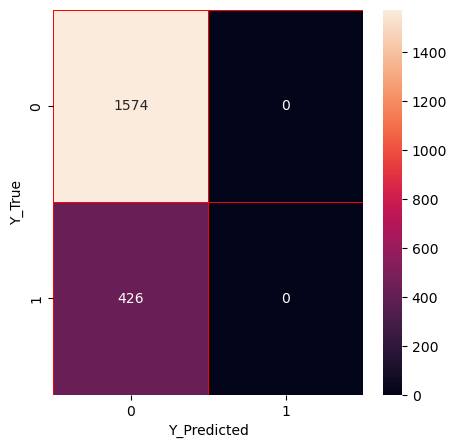

In [20]:
#heatmap
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(cm,annot=True,linewidth=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.xlabel("Y_Predicted")
plt.ylabel("Y_True")
plt.show()